In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Загрузка данных

In [41]:
#Использую локальную директорию

# %%capture
# !wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [42]:
data = pd.read_excel('data/data_ford_price.xlsx') 
data.describe()

,price,year,condition,cylinders,odometer,lat,long,weather
count,7017.000000,7017.000000,7017.000000,7017.000000,7.017000e+03,7017.000000,7017.000000,6837.000000
mean,15121.549523,2007.869745,2.598689,7.374662,1.199787e+05,39.550144,-91.903404,52.142899
std,11765.423119,6.975329,0.703662,0.942928,8.992216e+04,5.745409,14.030710,7.954830
min,1.000000,1957.000000,0.000000,3.000000,0.000000e+00,-2.508807,-151.055832,29.000000
25%,5995.000000,2004.000000,2.000000,6.000000,7.328500e+04,35.661076,-95.937145,45.000000
50%,12750.000000,2010.000000,3.000000,8.000000,1.180000e+05,40.335245,-88.168416,51.000000
75%,21995.000000,2013.000000,3.000000,8.000000,1.578040e+05,43.582100,-82.706300,59.000000
max,299500.000000,2018.000000,5.000000,10.000000,2.490000e+06,77.617682,-5.377999,71.000000


# Трансформация признаков

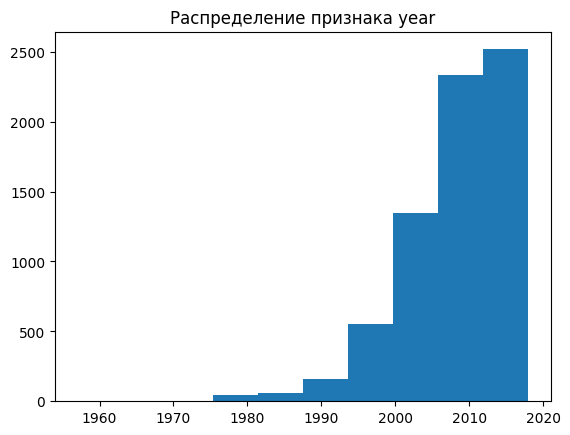

In [43]:
plt.hist(data.year)
plt.title('Распределение признака year');

## Квантильное преобразование

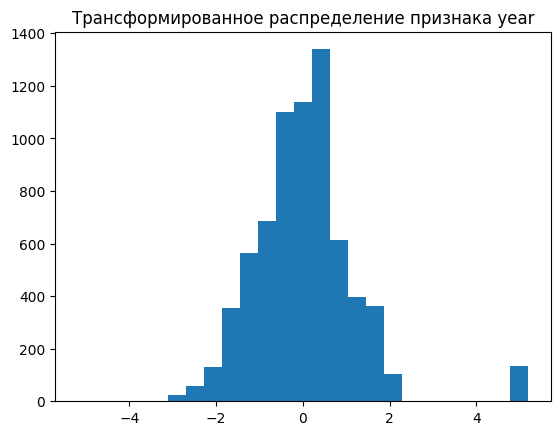

In [44]:
data_for_transform = data['year'].values.reshape((len(data),1))
# Данный трансформер принимает на вход 2D-массив, поэтому нам надо 
# изменить формат данных (поскольку мы подаём на вход только один столбец)

quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

In [45]:
#Задание 6.1

data_for_transform_61 = data[['condition', 'cylinders']]
quantiletrans = QuantileTransformer(output_distribution='uniform')
data_transformed_61 = quantiletrans.fit_transform(data_for_transform_61.values)

data_transformed_61 = pd.DataFrame(data_transformed_61, columns=data_for_transform_61.columns)

print(round(data_transformed_61['condition'][0], 2))

0.96


## Логарифмическое преобразование

In [46]:
#Задание 6.2
print(np.log10(10))
print(np.log10(100))
print(np.log10(100000))

1.0
2.0
5.0


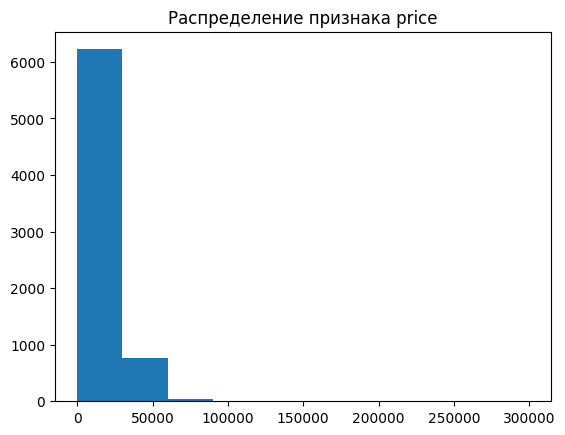

In [47]:
plt.hist(data.price)
plt.title('Распределение признака price');

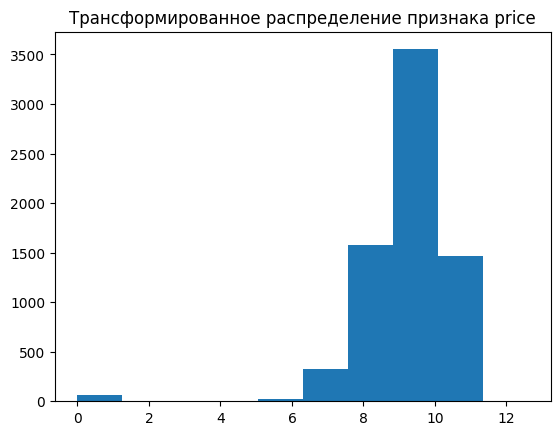

In [48]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

In [49]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
 
display(price_data.describe())

#Задание 6.3
print(round(log_price[7016], 1))

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


9.8


## Преобразование Бокса-Кокса/Йео-Джонсона

In [50]:
# Предположим, что data — это DataFrame с колонками 'price' и 'year'
# Проверим наличие и корректность данных
if 'price' not in data.columns or 'year' not in data.columns:
    raise ValueError("В DataFrame отсутствуют колонки 'price' и 'year'")

# Проверим, есть ли отрицательные значения или нули
if (data[['price', 'year']] <= 0).any().any():
    raise ValueError("Для применения Box-Cox все значения должны быть положительными")

In [51]:
box_cox = PowerTransformer(method = 'yeo-johnson')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])
data_box_cox

c:\Users\telis\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\telis\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


,transformed_price,transformed_year
0,1.911635,1.302898
1,0.270191,0.096299
2,-1.370519,-0.932286
3,-1.719488,-1.197174
4,0.132684,0.257121
...,...,...
7012,0.781188,1.118540
7013,-0.733704,-0.511518
7014,-0.238952,-0.364727
7015,-0.145558,0.421649


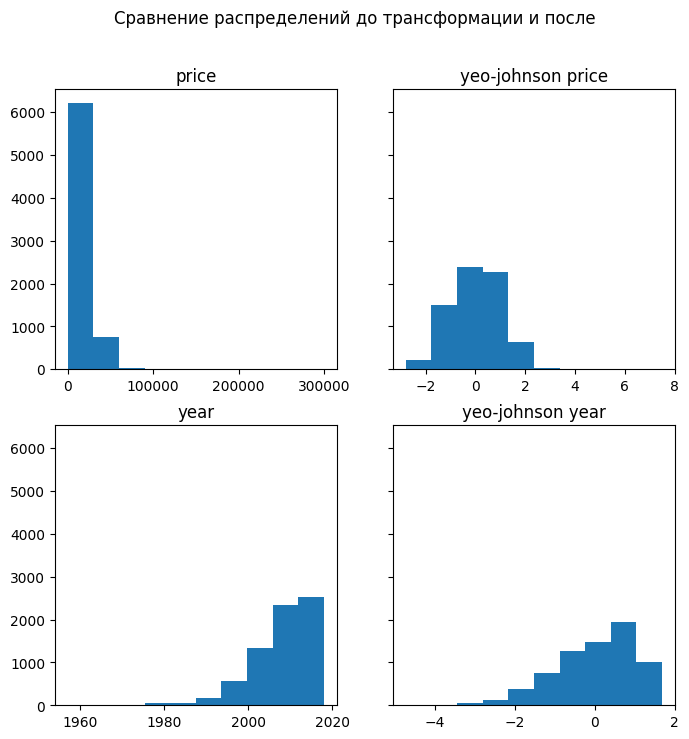

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
axs[0][0].hist(data['price'])
axs[1][0].hist(data['year'])
axs[0][1].hist(data_box_cox['transformed_price'])
axs[1][1].hist(data_box_cox['transformed_year'])

axs[0][0].set(title='price')
axs[0][1].set(title='yeo-johnson price')

axs[1][0].set(title='year')
axs[1][1].set(title='yeo-johnson year')

fig.suptitle('Сравнение распределений до трансформации и после')

plt.show()